In [ ]:
# 콜랩을 추천

In [ ]:
import os

In [ ]:
import pickle
# save and compress.
with open('/content/drive/MyDrive/deeplearning_file/sg/imageswithcut.pickle', 'rb') as f:
    images = pickle.load(f)

with open('/content/drive/MyDrive/deeplearning_file/sg/labelswithcut.pickle', 'rb') as f:
    labels = pickle.load(f)

In [ ]:
canpath1 =  '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/can/'
canpath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/can/cut/'
glasspath1 =  '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/glass/'
glasspath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/glass/cut/'
paperpath1 =  '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/paper/'
paperpath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/paper/cut/'
plasticpath1 =  '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/plastic/'
plasticpath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/plastic/cut/'

In [ ]:
canfiles1 = os.listdir(canpath1)
canfiles2 = os.listdir(canpath2)
glassfiles1 = os.listdir(glasspath1) 
glassfiles2 = os.listdir(glasspath2)
paperfiles1 = os.listdir(paperpath1) 
paperfiles2 =  os.listdir(paperpath2)
plasticfiles1 = os.listdir(plasticpath1)
plasticfiles2 = os.listdir(plasticpath2)

In [ ]:
full_names = canfiles + glassfiles + paperfiles + plasticfiles

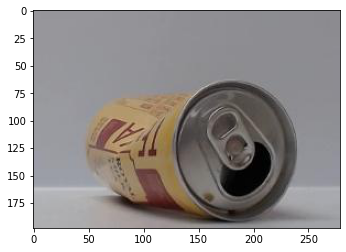

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(canfiles1)
image = mpimg.imread(canpath1 + sample)
plt.imshow(image)
plt.show()

In [ ]:
sample = random.choice(canfiles1)
image = mpimg.imread(canpath1 + sample)
image.shape

(203, 367, 3)

In [ ]:
folders = [canpath1, canpath2, glasspath1, glasspath2, paperpath1, paperpath2, plasticpath1, plasticpath2]

files = [canfiles1, canfiles2, glassfiles1, glassfiles2, paperfiles1, paperfiles2, plasticfiles1, plasticfiles2]

In [ ]:
from skimage.transform import resize
resized = resize(image, (128, 128, 3))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('image')
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title('Resized')

fig.tight_layout()
plt.show()

NameError: ignored

In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
labels=[]
images = []
for i in range(8) :
    path = folders[i]
    bar_total = tqdm(files[i])
    for file in bar_total:
        if (file == 'cut') or (file == '.ipynb_checkpoints'):
            continue
        try:
            image = mpimg.imread(path + file)
            images.append(resize(image, (128, 128, 3)))
            if i <= 1 :
                labels.append('can')
            elif i <= 3 :
                labels.append('glass')
            elif i <= 5 :
                labels.append('paper')
            elif i <= 7 :
                labels.append('plastic')
            else:
                print(f'{i}는 존재하지 않습니다.')
        except:
            pass


In [ ]:
len(images), len(labels)

(4196, 4196)

In [ ]:
import pickle
# save and compress.
with open('/content/drive/MyDrive/deeplearning_file/sg/imageswithcut.pickle', 'wb') as f:
    pickle.dump(images, f)

with open('/content/drive/MyDrive/deeplearning_file/sg/labelswithcut.pickle', 'wb') as f:
    pickle.dump(labels, f)

In [ ]:
images.shape, labels[:3]

((4196, 128, 128, 3), ['can', 'can', 'can'])

In [ ]:
images[:3]

array([[[[0.62352941, 0.60784314, 0.60392157],
         [0.62352941, 0.60784314, 0.60392157],
         [0.6196599 , 0.60397363, 0.60005206],
         ...,
         [0.5254902 , 0.51764706, 0.51764706],
         [0.52156863, 0.51372549, 0.51764706],
         [0.52156863, 0.51372549, 0.51764706]],

        [[0.61960784, 0.60392157, 0.6       ],
         [0.61960784, 0.60392157, 0.6       ],
         [0.61960784, 0.60392157, 0.6       ],
         ...,
         [0.52156863, 0.51764706, 0.51764706],
         [0.52152267, 0.51367953, 0.5176011 ],
         [0.51764706, 0.50980392, 0.51372549]],

        [[0.61568627, 0.6       , 0.59607843],
         [0.61568627, 0.6       , 0.59607843],
         [0.61568627, 0.6       , 0.59607843],
         ...,
         [0.5254902 , 0.51764706, 0.51772365],
         [0.52152267, 0.51367953, 0.5176011 ],
         [0.51764706, 0.50980392, 0.51372549]],

        ...,

        [[0.68314951, 0.68158701, 0.68158701],
         [0.68707108, 0.68314951, 0.68314951]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0]), array(['can', 'glass', 'paper', 'plastic'], dtype='<U7'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=13, stratify=labels_encoded)

X_train.shape, X_test.shape

((3356, 128, 128, 3), (840, 128, 128, 3))

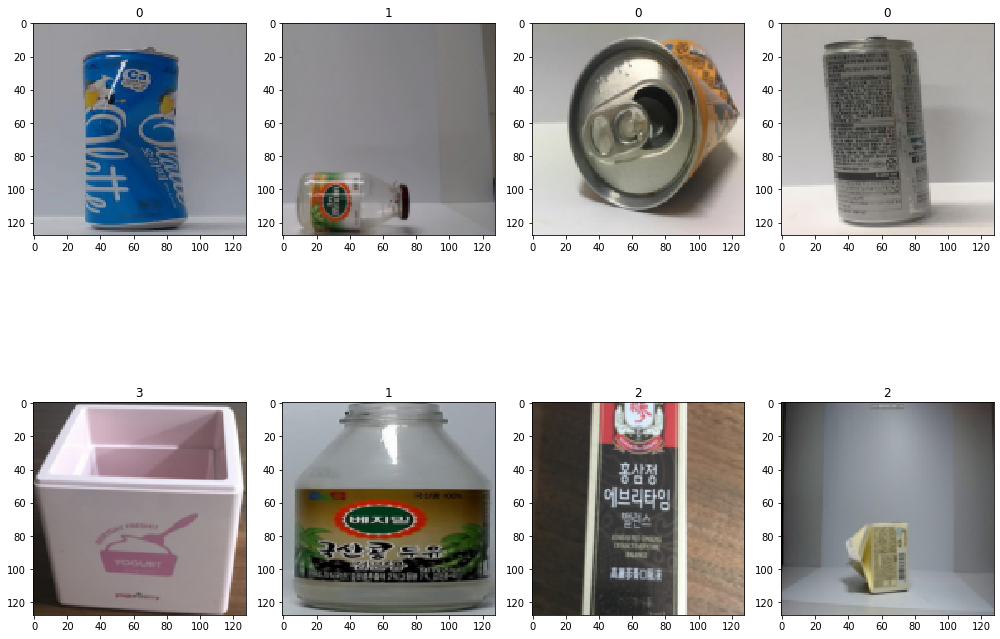

In [ ]:
samples = random.choices(population=range(0, len(X_train)), k=8)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 31, 31, 64)       

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
len(X_test)

840

In [ ]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=20, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test))
print('fit : time : ', time.time() - start_time)

Epoch 1/20
105/105 [==============================] - 109s 1s/step - loss: 1.3051 - accuracy: 0.5048 - val_loss: 0.9567 - val_accuracy: 0.6190
Epoch 2/20
105/105 [==============================] - 112s 1s/step - loss: 0.8269 - accuracy: 0.6695 - val_loss: 0.8444 - val_accuracy: 0.6929
Epoch 3/20
105/105 [==============================] - 107s 1s/step - loss: 0.6559 - accuracy: 0.7443 - val_loss: 0.6524 - val_accuracy: 0.7702
Epoch 4/20
105/105 [==============================] - 107s 1s/step - loss: 0.5061 - accuracy: 0.8075 - val_loss: 0.5541 - val_accuracy: 0.8000
Epoch 5/20
105/105 [==============================] - 108s 1s/step - loss: 0.4462 - accuracy: 0.8215 - val_loss: 0.4847 - val_accuracy: 0.8060
Epoch 6/20
105/105 [==============================] - 109s 1s/step - loss: 0.3899 - accuracy: 0.8492 - val_loss: 0.4466 - val_accuracy: 0.8369
Epoch 7/20
105/105 [==============================] - 112s 1s/step - loss: 0.3280 - accuracy: 0.8784 - val_loss: 0.4237 - val_accuracy: 0.8464

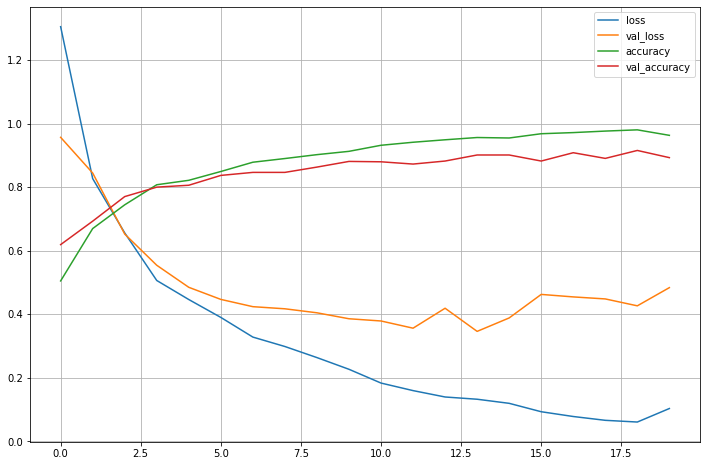

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [ ]:
score= model.evaluate(X_test, y_test)
print(f'loss: {score[0]}')
print(f'accuracy: {score[1]}')

27/27 [==============================] - 6s 225ms/step - loss: 0.4837 - accuracy: 0.8929
loss: 0.4836568832397461
accuracy: 0.8928571343421936


In [ ]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

In [ ]:
predicted_labels[:10], y_test[:10]

(array([1, 2, 0, 2, 2, 3, 3, 2, 2, 0]), array([1, 2, 2, 2, 3, 3, 3, 2, 3, 3]))

In [ ]:
wrong_result = []
for n in range(len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

90

In [ ]:
import random 
samples = random.choices(population=wrong_result, k=25)

In [ ]:
plt.figure(figsize=(100, 200))

for i, n in enumerate(samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[n])
    plt.title('label' + str(y_test[n])+ 'Predict'+ str(predicted_labels[n]), fontsize=70)
    plt.axis('off')

plt.show()

In [ ]:
with open('/content/drive/MyDrive/deeplearning_file/sg/modelswithcut.pickle', 'wb') as f:
    pickle.dump(model, f)

TypeError: ignored

In [ ]:
model_json = model.to_json()
with open('/content/drive/MyDrive/deeplearning_file/sg/modelswithcut.json', "w") as json_file :
	json_file.write(model_json)

In [ ]:
model.save('/content/drive/MyDrive/deeplearning_file/sg/modelswithcut.h5')

In [ ]:
len(images), len(labels)

(3770, 3770)

In [ ]:
import pickle
# load files
with open('/content/drive/MyDrive/deeplearning_file/sg/imageswithoutcut.pickle', 'rb') as f:
    images = pickle.load(f)

with open('/content/drive/MyDrive/deeplearning_file/sg/labelswithoutcut.pickle', 'rb') as f:
    labels = pickle.load(f)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0]), array(['can', 'glass', 'paper', 'plastic'], dtype='<U7'))

In [ ]:
import numpy as np
s0 = len(np.where(labels_encoded==0)[0])
s1 = len(np.where(labels_encoded==1)[0])
s2 = len(np.where(labels_encoded==2)[0])
s3 = len(np.where(labels_encoded==3)[0])

In [ ]:
import os
canpath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/can/cut/'
glasspath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/glass/cut/'
paperpath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/paper/cut/'
plasticpath2 = '/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/plastic/cut/'
canfiles2 = os.listdir(canpath2)
glassfiles2 = os.listdir(glasspath2)
paperfiles2 =  os.listdir(paperpath2)
plasticfiles2 = os.listdir(plasticpath2)

In [ ]:
folders = [canpath2, glasspath2,  paperpath2,  plasticpath2]
files = [ canfiles2,  glassfiles2,  paperfiles2,  plasticfiles2]

In [ ]:
import matplotlib.image as mpimg
file = files[0][1]
image = mpimg.imread(folders[0] + file)
image.shape, file

((266, 114, 4), 'label_can_jy_58.jpg')

In [ ]:
checks = set()
for i in range(4) :
    path = folders[i]
    for file in files[i]:
        image = mpimg.imread(path + file)
        checks.add(image.shape[2])
print(checks)

{3, 4}


In [ ]:
checks = set()
for i in range(4) :
    path = folders[i]
    for file in files[i]:
        image = mpimg.imread(path + file)
        if image.shape[2] == 4:
            for _ in range(len(set(image[:,:,3].reshape(-1)))):
                checks.add(set(image[:,:,3].reshape(-1)).pop())
print(checks)

{255}


In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
from skimage.transform import resize
for i in range(4) :
    path = folders[i]
    bar_total = tqdm(files[i])
    for file in bar_total:
        image = mpimg.imread(path + file)
        if image.shape[2] == 4:
            image = image[:,:,:3]
        images = np.append(images, np.array([resize(image, (128, 128, 3))]), axis=0)
        if i == 0 :
            labels.append('can')
        elif i == 1 :
            labels.append('glass')
        elif i == 2 :
            labels.append('paper')
        elif i == 3 :
            labels.append('plastic')
        else:
            print(f'{i}는 존재하지 않습니다.')


In [ ]:
image.shape

(288, 146, 3)

In [ ]:
images.shape

(4196, 128, 128, 3)

In [ ]:
len(images), len(labels), len(labels_encoded)

(4196, 4196, 4196)

In [ ]:
encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([0, 0, 0]), array(['can', 'glass', 'paper', 'plastic'], dtype='<U7'))

In [ ]:
len(images), len(labels), len(labels_encoded)

(4196, 4196, 4196)

In [ ]:
X_train = np.concatenate((images[:int(s0*0.8)], images[s0:s0+int(s1*0.8)], images[s0+s1:s0+s1+int(s2*0.8)], images[s0+s1+s2:s0+s1+s2+int(s3 *0.8)], images[s0+s1+s2+s3:] ), axis=0)
X_test = np.concatenate((images[int(s0*0.8):s0], images[s0+int(s1*0.8):s0+s1], images[s0+s1+int(s2*0.8):s0+s1+s2], images[s0+s1+s2+int(s3*0.8):s0+s1+s2+s3]), axis=0)
y_train = np.concatenate((labels_encoded[:int(s0*0.8)], labels_encoded[s0:s0+int(s1*0.8)], labels_encoded[s0+s1:s0+s1+int(s2*0.8)], labels_encoded[s0+s1+s2:s0+s1+s2+int(s3 *0.8)], labels_encoded[s0+s1+s2+s3:]), axis=0)
y_test = np.concatenate((labels_encoded[int(s0*0.8):s0], labels_encoded[s0+int(s1*0.8):s0+s1], labels_encoded[s0+s1+int(s2*0.8):s0+s1+s2], labels_encoded[s0+s1+s2+int(s3*0.8):s0+s1+s2+s3]), axis=0)

X_train.shape, X_test.shape

((3441, 128, 128, 3), (755, 128, 128, 3))

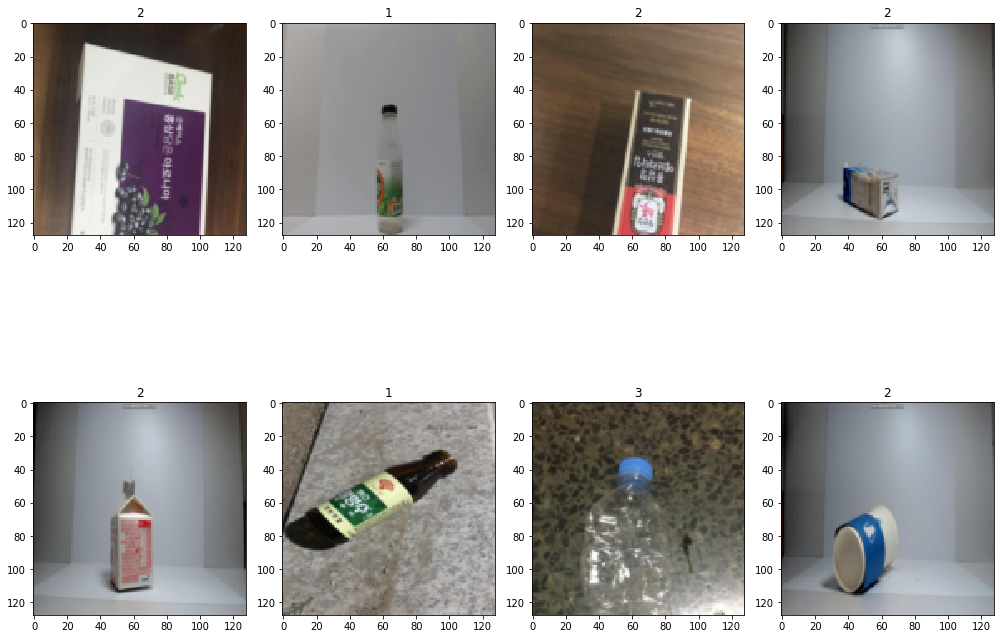

In [ ]:
import random
import matplotlib.pyplot as plt

samples = random.choices(population=range(0, len(X_train)), k=8)

plt.figure(figsize=(14, 12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])
    
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
model2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4, activation='softmax')
])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        3

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
len(X_test)

755

In [ ]:
import time

start_time = time.time()
hist = model2.fit(X_train.reshape(len(X_train), 128, 128, 3), y_train, epochs=20, verbose=1, validation_data=(X_test.reshape(len(X_test), 128, 128, 3), y_test), shuffle=True)
print('fit : time : ', time.time() - start_time)

Epoch 1/20
108/108 [==============================] - 119s 1s/step - loss: 1.1998 - accuracy: 0.5327 - val_loss: 1.1145 - val_accuracy: 0.5245
Epoch 2/20
108/108 [==============================] - 117s 1s/step - loss: 0.7616 - accuracy: 0.7059 - val_loss: 1.0226 - val_accuracy: 0.4993
Epoch 3/20
108/108 [==============================] - 106s 984ms/step - loss: 0.6093 - accuracy: 0.7710 - val_loss: 0.8595 - val_accuracy: 0.6146
Epoch 4/20
108/108 [==============================] - 106s 981ms/step - loss: 0.4778 - accuracy: 0.8256 - val_loss: 0.8315 - val_accuracy: 0.6106
Epoch 5/20
108/108 [==============================] - 107s 994ms/step - loss: 0.3910 - accuracy: 0.8529 - val_loss: 0.8361 - val_accuracy: 0.5974
Epoch 6/20
108/108 [==============================] - 105s 975ms/step - loss: 0.3333 - accuracy: 0.8747 - val_loss: 0.8998 - val_accuracy: 0.6318
Epoch 7/20
108/108 [==============================] - 106s 982ms/step - loss: 0.2814 - accuracy: 0.8980 - val_loss: 0.8736 - val_a

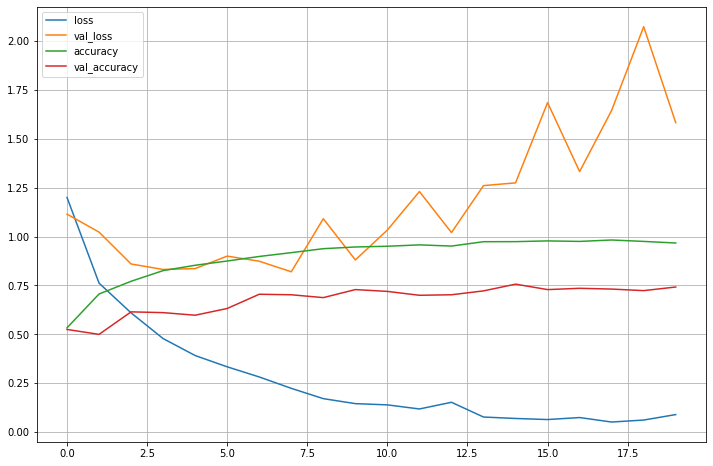

In [ ]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [ ]:
score= model2.evaluate(X_test, y_test)
print(f'loss: {score[0]}')
print(f'accuracy: {score[1]}')

24/24 [==============================] - 6s 229ms/step - loss: 1.5824 - accuracy: 0.7417
loss: 1.582439661026001
accuracy: 0.7417218685150146


In [ ]:
import numpy as np

predicted_result = model2.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

In [ ]:
predicted_labels[:10], y_test[:10]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
wrong_result = []
for n in range(len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

195

In [ ]:
import random 
samples = random.choices(population=wrong_result, k=25)

In [ ]:
plt.figure(figsize=(100, 200))

for i, n in enumerate(samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[n])
    plt.title('label' + str(y_test[n])+ 'Predict'+ str(predicted_labels[n]), fontsize=70)
    plt.axis('off')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_train[-1]

array([[[0.56470588, 0.58431373, 0.61568627],
        [0.56470588, 0.58431373, 0.61568627],
        [0.56470588, 0.58431373, 0.61568627],
        ...,
        [0.65150123, 0.68235294, 0.70588235],
        [0.65150123, 0.68235294, 0.70588235],
        [0.65150123, 0.68235294, 0.70588235]],

       [[0.56470588, 0.58431373, 0.61176471],
        [0.56470588, 0.58431373, 0.61176471],
        [0.56470588, 0.58431373, 0.61176471],
        ...,
        [0.65098039, 0.68235294, 0.70588235],
        [0.65098039, 0.68235294, 0.70588235],
        [0.65098039, 0.68235294, 0.70588235]],

       [[0.56470588, 0.58431373, 0.61176471],
        [0.56470588, 0.58431373, 0.61176471],
        [0.56470588, 0.58431373, 0.61176471],
        ...,
        [0.65490196, 0.67843137, 0.70588235],
        [0.65490196, 0.67843137, 0.70588235],
        [0.65490196, 0.67843137, 0.70588235]],

       ...,

       [[0.65098039, 0.66666667, 0.6745098 ],
        [0.65098039, 0.66666667, 0.6745098 ],
        [0.65098039, 0

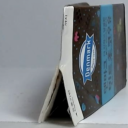

In [ ]:
from PIL import Image
Image.fromarray((255*images[-1]).astype('u1'))

In [ ]:
mpimg.imread('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/can/cut/label_can_jy_1.jpg').shape

(270, 214, 4)

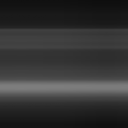

In [ ]:
labels[-30]

'glass'

In [ ]:
image = mpimg.imread('/content/drive/MyDrive/deeplearning_file/recyclable_materials/labeling_Img_1/paper/cut/label_paper_ks_25.jpg')
Image.fromarray((255*resize(image,(128, 128, 3))).astype('u1'))

TypeError: ignored

In [ ]:
from skimage.transform import resize


In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np
from skimage.transform import resize
images = []
images1 = []
for i in range(4) :
    path = folders[i]
    bar_total = tqdm(files[i])
    for file in bar_total:
        if (file == 'cut') or (file == '.ipynb_checkpoints'):
            continue

        image = mpimg.imread(path + file)
        images.append(resize(image, (128, 128, 3)))
        images1.append(image)

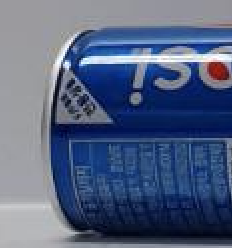

In [ ]:
from PIL import Image
Image.fromarray((image2.astype('u1')))

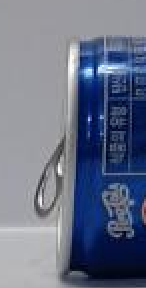

In [ ]:
Image.fromarray((images1[0].astype('u1')))

In [ ]:
images[0].shape

(1, 128, 128, 3)

In [ ]:
images[0]

array([[[0.60392157, 0.60980392, 0.92941176],
        [0.60392157, 0.60980392, 0.92941176],
        [0.60392157, 0.60980392, 0.92941176],
        ...,
        [0.59607843, 0.61372549, 0.93202614],
        [0.59607843, 0.61372549, 0.93202614],
        [0.59607843, 0.61372549, 0.93202614]],

       [[0.60106209, 0.60980392, 0.92941176],
        [0.60106209, 0.60980392, 0.92941176],
        [0.60106209, 0.60980392, 0.92941176],
        ...,
        [0.59607843, 0.61372549, 0.93202614],
        [0.59607843, 0.61372549, 0.93202614],
        [0.59607843, 0.61372549, 0.93202614]],

       [[0.60065359, 0.60980392, 0.92941176],
        [0.60065359, 0.60980392, 0.92941176],
        [0.60065359, 0.60980392, 0.92941176],
        ...,
        [0.59607843, 0.61372549, 0.93202614],
        [0.59607843, 0.61372549, 0.93202614],
        [0.59607843, 0.61372549, 0.93202614]],

       ...,

       [[0.71372549, 0.71764706, 0.94705882],
        [0.71372549, 0.71764706, 0.94705882],
        [0.71372549, 0

In [ ]:
resize(images1[0], (128, 128))

array([[[0.60392157, 0.60392157, 0.61568627, 0.99607843],
        [0.60392157, 0.60392157, 0.61568627, 0.99607843],
        [0.60392157, 0.60392157, 0.61568627, 0.99607843],
        ...,
        [0.59607843, 0.59607843, 0.63137255, 0.99607843],
        [0.59607843, 0.59607843, 0.63137255, 0.99607843],
        [0.59607843, 0.59607843, 0.63137255, 0.99607843]],

       [[0.6004902 , 0.60392157, 0.61568627, 0.99607843],
        [0.6004902 , 0.60392157, 0.61568627, 0.99607843],
        [0.6004902 , 0.60392157, 0.61568627, 0.99607843],
        ...,
        [0.59607843, 0.59607843, 0.63137255, 0.99607843],
        [0.59607843, 0.59607843, 0.63137255, 0.99607843],
        [0.59607843, 0.59607843, 0.63137255, 0.99607843]],

       [[0.6       , 0.60392157, 0.61568627, 0.99607843],
        [0.6       , 0.60392157, 0.61568627, 0.99607843],
        [0.6       , 0.60392157, 0.61568627, 0.99607843],
        ...,
        [0.59607843, 0.59607843, 0.63137255, 0.99607843],
        [0.59607843, 0.596078

In [ ]:
images1[0]

array([[[155, 154, 158, 255],
        [155, 154, 158, 255],
        [155, 154, 158, 255],
        ...,
        [152, 152, 161, 255],
        [152, 152, 161, 255],
        [152, 152, 161, 255]],

       [[155, 155, 158, 255],
        [155, 155, 158, 255],
        [155, 155, 158, 255],
        ...,
        [152, 152, 161, 255],
        [152, 152, 161, 255],
        [152, 152, 161, 255]],

       [[155, 155, 158, 255],
        [155, 155, 158, 255],
        [155, 155, 158, 255],
        ...,
        [152, 152, 161, 255],
        [152, 152, 161, 255],
        [152, 152, 161, 255]],

       ...,

       [[180, 180, 182, 255],
        [180, 180, 182, 255],
        [180, 180, 182, 255],
        ...,
        [ 49,  57,  73, 255],
        [ 52,  60,  76, 255],
        [ 52,  60,  76, 255]],

       [[180, 180, 182, 255],
        [180, 180, 182, 255],
        [180, 180, 182, 255],
        ...,
        [ 49,  57,  73, 255],
        [ 52,  60,  76, 255],
        [ 52,  60,  76, 255]],

       [[179